### Bağımlı İki Örneklem T Testi

**Problem**

Bir gruba verilen eğitimin katkı saülayıp sağlamadığı test edilmek isteniyor.

**Detaylar**

Eğitim talep ediliyor

eğitim alınıyor

eğitim öncesi sonrası ölçümler yapılıyor

eğitim sonrası eğitimin sağladığı katma değer test edilmek isteniyor

In [7]:
import pandas as pd
import numpy as np
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [8]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [9]:
sonrasi.head()

,0
0,118
1,127
2,122
3,132
4,129


In [10]:
#Alttaki kod ana odaüımız değil. Ama ihtiyacımız olabilecek bir veri seti.
#vahit hoca bi paylaşmış işte
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



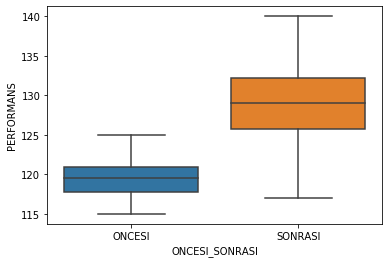

In [11]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

In [12]:
#Görüldüğü üzre grafiğe bakarsak ne t şekilde etkili olmuş ama bilimsel olarak ıspatlı değil

**Varsayım Kontrolleri**

In [13]:
#normallik testi
from scipy.stats import shapiro

In [14]:
shapiro(AYRIK.ONCESI)

(0.9543656706809998, 0.10722451657056808)

In [15]:
#H0 hipotezimiz neydi?= anlamlı bir fark yok. 
# ONCESİ P-Value > 0,05 oldugundan reddedemiyoruz . SONRASI'na bakalım 

In [16]:
shapiro(AYRIK.SONRASI)

(0.9780089259147644, 0.6159515380859375)

In [17]:
# SONRASI P-Value > 0,05 oldugundan reddedemiyoruz.

In [18]:
#Yani ilk varsayım, normallik geçildi. 

In [19]:
#2.Varsayımımızı test edelim. = VARYANS HOOJENLİĞİ

In [20]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [21]:
#şimdiii p-value 0.05 ten küçük çıktı. Yani h0 hipotezi reddedilmelidir
#ve varyansların homojenliği varsayımı sağlanmamaktadır 

# buradada 2 yol izleyebiliriz.1.seçenek; veri setinde bazı aykırılıklar düzenlenebilir öyle bi bakılır
#2.seçenek=Bu bir miktar göz ardı edilebilien bir durumdur dedi vahit hoca. Ama incelenmeli(benim açımdan). Tam anlamadım
# biz şu an göz ardı edeceğiz.

In [22]:
#T testi
import scipy.stats as stats
stats.ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

**p-value < 0.05 olduğundan, RRRRRRRRRrrreddedildi**

In [23]:
# Şİmdiiiiiiiiiiiiii   Varsayalım ki önceki bölümdeki normallik varsayımı ve
#homojenlik varsayımı sağlanmadı... ne yapacaz? 

**=NONPARAMETRİK T TESTİ.**

In [26]:
stats.wilcoxon(AYRIK.ONCESI,AYRIK.SONRASI)
#wilcoxon testi bagımlı 2 örneklem t testidir.

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [ ]:
yine < 0 çıktığından rreddedildi.